# Exploratory Data Analysis (EDA) para Investigación

## Paso 1: Carga y Previsualización de Datos
Este paso incluye la carga del dataset y una primera exploración para entender las características del mismo. Usaremos un dataset sobre recurrencia del cáncer diferenciado de tiroides.

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Descargar el dataset desde UCI Machine Learning Repository
differentiated_thyroid_cancer_recurrence = fetch_ucirepo(id=915)

# Cargar las características (X) y la variable objetivo (y)
X = differentiated_thyroid_cancer_recurrence.data.features
y = differentiated_thyroid_cancer_recurrence.data.targets

# Combinar las características y la variable objetivo en un solo DataFrame
df = pd.concat([X, y], axis=1)
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


## Paso 2: Análisis Exploratorio Inicial
En esta sección, examinamos la estructura de los datos, verificamos tipos de columnas, valores faltantes y distribución de las variables. También visualizamos la distribución de la variable objetivo.

Primeras filas del dataset:
    Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
0   27      F      No         No              No        Euthyroid   
1   34      F      No        Yes              No        Euthyroid   
2   30      F      No         No              No        Euthyroid   
3   62      F      No         No              No        Euthyroid   
4   62      F      No         No              No        Euthyroid   

          Physical Examination Adenopathy       Pathology     Focality Risk  \
0   Single nodular goiter-left         No  Micropapillary    Uni-Focal  Low   
1          Multinodular goiter         No  Micropapillary    Uni-Focal  Low   
2  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
3  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
4          Multinodular goiter         No  Micropapillary  Multi-Focal  Low   

     T   N   M Stage       Response Recurred  
0  T1a  N0  M0     I  Indeterminat

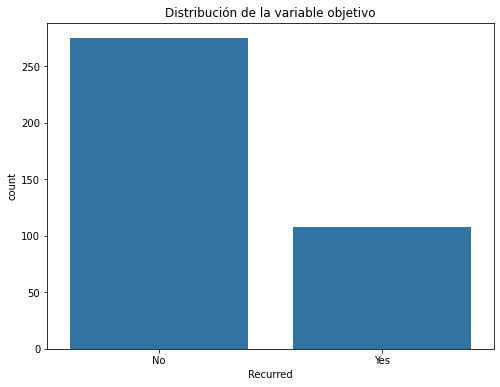

In [2]:
# Resumen de las primeras filas
print("Primeras filas del dataset:\n", df.head())

# Información sobre las columnas y tipos de datos
print("\nInformación del dataset:\n")
print(df.info())

# Estadísticas descriptivas generales
print("\nEstadísticas descriptivas:\n")
print(df.describe(include='all'))

# Visualización de la distribución de la variable objetivo
plt.figure(figsize=(8, 6))
sns.countplot(x='Recurred', data=df)
plt.title('Distribución de la variable objetivo')
plt.show()


## Paso 3: Preprocesamiento de Datos
### Eliminación de Columnas Irrelevantes
Eliminamos columnas que no son relevantes para el análisis, como identificadores únicos.

In [3]:
# Eliminar columnas irrelevantes si existen
df = df.drop(columns=['ID', 'Ubigeo'], errors='ignore')
print("Dataset después de eliminar columnas irrelevantes:\n", df.head())

Dataset después de eliminar columnas irrelevantes:
    Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
0   27      F      No         No              No        Euthyroid   
1   34      F      No        Yes              No        Euthyroid   
2   30      F      No         No              No        Euthyroid   
3   62      F      No         No              No        Euthyroid   
4   62      F      No         No              No        Euthyroid   

          Physical Examination Adenopathy       Pathology     Focality Risk  \
0   Single nodular goiter-left         No  Micropapillary    Uni-Focal  Low   
1          Multinodular goiter         No  Micropapillary    Uni-Focal  Low   
2  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
3  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
4          Multinodular goiter         No  Micropapillary  Multi-Focal  Low   

     T   N   M Stage       Response Recurred  
0  T1a  N0 

### Manejo de Valores Nulos
Imputamos valores faltantes utilizando la mediana para variables numéricas y la moda para variables categóricas.

In [4]:
# Separar columnas numéricas y categóricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Imputar valores faltantes
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verificar que ya no haya valores nulos
print(df.isnull().sum())

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64


### División en Conjuntos de Entrenamiento y Prueba
Dividimos los datos en conjuntos de entrenamiento (80%) y prueba (20%), asegurando la estratificación en la variable objetivo.

In [5]:
# Definir características y variable objetivo
X = df.drop(columns=['Recurred'])
y = df['Recurred']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print("Formas de los conjuntos:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)

Formas de los conjuntos:
X_train: (306, 16) X_test: (77, 16)


### Codificación de Variables Categóricas
Convertimos las variables categóricas a formato numérico para que sean compatibles con algoritmos de machine learning.

In [6]:
# Codificar variables categóricas
label_encoders = {}
for col in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

# Codificar la variable objetivo
le_target = LabelEncoder()
y_train = le_target.fit_transform(y_train)
y_test = le_target.transform(y_test)


### Verificación Final de Conjuntos
Comprobamos la distribución de la variable objetivo en los conjuntos de entrenamiento y prueba.

In [8]:
# Verificar la distribución de la variable objetivo
print("Distribución en el conjunto de entrenamiento:", pd.Series(y_train).value_counts())
print("Distribución en el conjunto de prueba:", pd.Series(y_test).value_counts())

Distribución en el conjunto de entrenamiento: 0    220
1     86
Name: count, dtype: int64
Distribución en el conjunto de prueba: 0    55
1    22
Name: count, dtype: int64


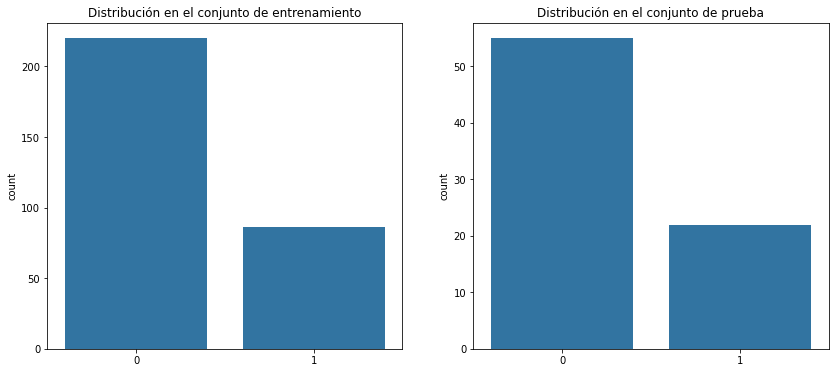

In [9]:
# Graficar la distribución de la variable objetivo en los conjuntos de entrenamiento y prueba
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title('Distribución en el conjunto de entrenamiento')
sns.countplot(x=y_test, ax=axes[1])
axes[1].set_title('Distribución en el conjunto de prueba')
plt.show()

## Paso 4: Guardar los Datos Preprocesados
Guardamos los conjuntos preprocesados en archivos CSV para futuras etapas de análisis o modelado.

In [10]:
# Guardar conjuntos preprocesados
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
pd.DataFrame(y_train, columns=['Recurred']).to_csv('y_train.csv', index=False)
pd.DataFrame(y_test, columns=['Recurred']).to_csv('y_test.csv', index=False)
print("Conjuntos preprocesados guardados exitosamente.")

Conjuntos preprocesados guardados exitosamente.


## Paso 5: Evaluación Inicial de Modelos de Clasificación
Evaluamos el rendimiento de clasificadores estándar en los datos originales.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from IPython.display import display
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, recall_score, confusion_matrix, matthews_corrcoef

In [12]:
# Cargar los conjuntos de entrenamiento y prueba
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').squeeze()
y_test = pd.read_csv('y_test.csv').squeeze()

In [13]:
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'MLP': MLPClassifier(random_state=42, max_iter=1000),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

In [14]:
# Lista para guardar los resultados
results = []

In [19]:
# Entrenar y evaluar cada clasificador en los datos originales (sin generar ni balancear datos)
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  # Entrenar el clasificador en los datos originales
    
    # Predicciones en el conjunto de prueba original
    y_pred = clf.predict(X_test)
    y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Obtener probabilidades para AUC-ROC
    
    # Calcular las métricas
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_prob)
    
    # Specificity (Verdaderos Negativos / Total de Negativos)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    
    # MCC (Matthews Correlation Coefficient)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    # Guardar los resultados en un diccionario
    results.append({
        'Modelo': name,
        'Accuracy': round(accuracy, 4),
        'Recall': round(recall, 4),
        'F1-Score': round(f1, 4),
        'AUC-ROC': round(auc_roc, 4),
        'Specificity': round(specificity, 4),
        'MCC': round(mcc, 4)
    })

In [20]:
# Crear un DataFrame a partir de los resultados
results_df = pd.DataFrame(results)

In [21]:
# Mostrar la tabla de resultados
print("Resultados de los clasificadores:")
display(results_df)

Resultados de los clasificadores:


,Modelo,Accuracy,Recall,F1-Score,AUC-ROC,Specificity,MCC
0,Random Forest,0.948052,0.863636,0.904762,0.987190,0.981818,0.871025
1,MLP,0.922078,0.909091,0.869565,0.980992,0.927273,0.815726
2,Logistic Regression,0.922078,0.909091,0.869565,0.970248,0.927273,0.815726
3,Random Forest,0.948100,0.863600,0.904800,0.987200,0.981800,0.871000
4,MLP,0.922100,0.909100,0.869600,0.981000,0.927300,0.815700
5,Logistic Regression,0.922100,0.909100,0.869600,0.970200,0.927300,0.815700
6,Random Forest,0.948100,0.863600,0.904800,0.987200,0.981800,0.871000
7,MLP,0.922100,0.909100,0.869600,0.981000,0.927300,0.815700
8,Logistic Regression,0.922100,0.909100,0.869600,0.970200,0.927300,0.815700


In [22]:
results_df.to_csv('resultados_clasificadores_sin_balanceo.csv', index=False)
print("Resultados guardados exitosamente en 'resultados_clasificadores_sin_balanceo.csv'")

Resultados guardados exitosamente en 'resultados_clasificadores_sin_balanceo.csv'
